**Python Libraries**

In [ ]:
# importing the libraries
import numpy as np   
import pandas as pd  

In [ ]:
# importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Getting the Dataset**

In [ ]:
# initializing the dataset with a variable name
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'

In [ ]:
# reading the dataset into a pandas dataframe and displaying the first few inputs of the dataframe subsequently
fuel_utility = pd.read_csv(url, error_bad_lines=False)
fuel_utility.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


**Quiz**

In [ ]:
#Question 1

#Lists
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [ ]:
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [ ]:
#Question 2

matrix_arr = np.eye(3)
matrix_arr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
matrix_arr2 = np.identity(3)
matrix_arr2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#Question 3

#group by the fuel type code year and print the first entries in all the groups formed
fuel_utility.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [ ]:
#Question 4


fuel_utility.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2003_12_186_0_10,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [ ]:
#Question 5


from scipy.stats import kurtosis, skew
fuel_utility['fuel_qty_burned'].skew()

15.851495469109503

In [ ]:
fuel_utility['fuel_qty_burned'].kurtosis()

651.3694501337732

In [ ]:
#Question 6

fuel_utility.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
fuel_utility.shape

(29523, 11)

In [ ]:
#Question 7

fuel_utility.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


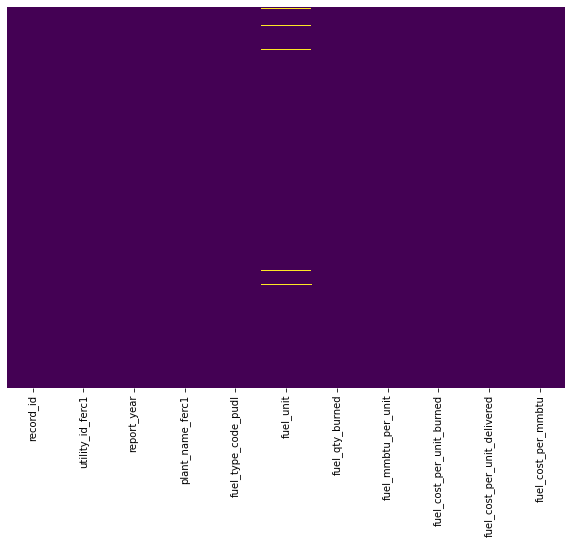

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(fuel_utility.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
fuel_utility[['fuel_unit']] = fuel_utility[['fuel_unit']].fillna(value='mcf')

In [ ]:
fuel_utility.isnull().sum()


record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
#Question 8



In [ ]:
#Question 9

df1 = fuel_utility.groupby('report_year')['fuel_cost_per_unit_burned'].sum()
df1

report_year
1994    263292.115
1995    425661.488
1996     86425.275
1997    163533.452
1998    140238.656
1999    126056.285
2000    326495.434
2001    180365.641
2002    121921.135
2003    149175.726
2004    184637.699
2005    135924.139
2006    188142.032
2007    256114.312
2008    314312.022
2009    263584.566
2010    331581.467
2011    374175.603
2012    321693.544
2013    306933.236
2014    518002.469
2015    260060.984
2016    255484.814
2017    244557.823
2018    221575.426
Name: fuel_cost_per_unit_burned, dtype: float64

In [ ]:
a  = df1[1994]
a

263292.1150000001

In [ ]:
b = df1[1998]
b

140238.6560000001

In [59]:
c = (a - b)/a * 100
print('percentage change: ', c)

percentage change:  46.73647708743574


In [ ]:
#Question 10

fuel_cost = fuel_utility.groupby('report_year')['fuel_cost_per_unit_delivered'].sum()
fuel_cost

report_year
1994    7.859053e+04
1995    3.931506e+04
1996    1.000602e+07
1997    1.218738e+07
1998    3.178799e+05
1999    2.682921e+04
2000    1.352903e+06
2001    8.142834e+04
2002    5.735121e+04
2003    6.740849e+04
2004    1.663129e+05
2005    5.258506e+04
2006    4.805125e+04
2007    5.476283e+04
2008    7.194631e+04
2009    7.975923e+05
2010    1.158381e+05
2011    7.412059e+04
2012    7.581617e+04
2013    2.065968e+05
2014    2.256952e+05
2015    3.569033e+05
2016    1.074344e+05
2017    4.587348e+04
2018    4.748057e+05
Name: fuel_cost_per_unit_delivered, dtype: float64

In [ ]:
fuel_cost.max()

12187375.780000014